Suggested improvement: Training the mega detector on The cod10k training dataset in hopes to improve the predictions for the test cod10k,

Procedure:

removed aquatic images from training data

split data into train, test, val to put it into a trainable format

made yolo txt files for all images ( empty files for empty images)

acquired mdv6 weights from thte following git repo
https://github.com/microsoft/CameraTraps/blob/main/PW_FT_detection/utils.py

and followed the steps in
https://github.com/microsoft/CameraTraps/tree/main/PW_FT_detection

to train the mdv6 model


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path

# Define base path
base_path = Path("/content/drive/MyDrive/DL_data/labels/labels_yolo")
splits = ["train", "val", "test"]

# Go through each split folder
for split in splits:
    split_path = base_path / split
    for txt_file in split_path.glob("*.txt"):
        if "human" in txt_file.name.lower():
            # Read the original lines
            with open(txt_file, "r") as f:
                lines = f.readlines()

            # Modify each line to change the category ID to 1
            updated_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # ensure it's a valid YOLO label
                    parts[0] = "1"  # change class ID to 1
                    updated_lines.append(" ".join(parts))
                else:
                    updated_lines.append(line.strip())  # keep malformed line unchanged

            # Write the updated lines back to the file
            with open(txt_file, "w") as f:
                f.write("\n".join(updated_lines))

print("✅ Category ID updated to 1 for all files containing 'human' in their name.")


✅ Category ID updated to 1 for all files containing 'human' in their name.


In [3]:
!git clone https://github.com/microsoft/CameraTraps.git


Cloning into 'CameraTraps'...
remote: Enumerating objects: 19711, done.
remote: Counting objects: 100% (527/527), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 19711 (delta 187), reused 268 (delta 161), pack-reused 19184 (from 4)
Receiving objects: 100% (19711/19711), 497.12 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (10240/10240), done.


In [4]:
%cd /content/CameraTraps/PW_FT_detection
!pip install wget
import sys
sys.path.insert(0, '/content/yolov9/CameraTraps/PW_FT_detection')
from detection_utils import get_model_path



/content/CameraTraps/PW_FT_detection
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3d6611f6fa8e1b98168044aac48291ee23dd8d0e614068591fc32792069f8a78
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [5]:
model_path = get_model_path("MDV6-yolov9-e")

In [6]:
pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of yolov5 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 M

In [8]:
with open("config.yaml", "w") as f:
    yaml.dump(dict(cfg), f)

In [15]:
config_text = """batch_size_train: 4
batch_size_val: 12
data: /content/drive/MyDrive/DL_data/your_data.yaml
device_train: 0
device_val: 0
epochs: 20
exp_name: MDV6-yolov9-e
imgsz: 640
lr0: 0.01
model: YOLO
model_name: MDV6-yolov9-e
optimizer: auto
patience: 5
plot: true
resume: false
save_json: true
save_period: 1
task: train
test_data: /content/drive/MyDrive/DL_data/images/test
val: true
weights: /content/drive/MyDrive/DL_data/weights/MDV6-yolov9-e.pt
workers: 8
"""

with open("/content/CameraTraps/PW_FT_detection/config.yaml", "w") as f:
    f.write(config_text)


In [11]:
import yaml

yaml_data = {
    "path": "/content/drive/MyDrive/DL_data",
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "names": {
        0: "animal",
        1: "person",
        2: "vehicle"
    }
}

with open("/content/drive/MyDrive/DL_data/your_data.yaml", "w") as f:
    yaml.dump(yaml_data, f, sort_keys=False)


In [16]:
!python main.py

YOLOv9e summary: 721 layers, 58,147,225 parameters, 0 gradients, 192.7 GFLOPs
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/root/.cache/torch/hub/checkpoints/MDV6-yolov9e.pt, data=/content/drive/MyDrive/DL_data/your_data.yaml, epochs=20, time=None, patience=5, batch=4, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=runs/train_MDV6-yolov9-e, name=exp3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

In [20]:
!pip install ultralytics
from ultralytics import YOLO

# Load your trained model from Drive
model = YOLO("/content/drive/MyDrive/DL_data/exp3_unzipped/weights/last.pt")


Testing out the trained model

In [21]:
results = model("/content/COD10K-CAM-2-Terrestrial-31-Gecko-1927.jpg", conf=0.1, save=True)
#print(results)
print(results[0].boxes)



image 1/1 /content/COD10K-CAM-2-Terrestrial-31-Gecko-1927.jpg: 448x640 (no detections), 9042.3ms
Speed: 29.0ms preprocess, 9042.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (682, 1023)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


In [11]:
from ultralytics import YOLO

# Load the model (if not already loaded)
image_path = "/content/COD10K-CAM-2-Terrestrial-31-Gecko-1927.jpg"
results = model(image_path, save=True)

# Extract result for the first image (only one in this case)
result = results[0]

# Check for detections

if result.boxes and len(result.boxes) > 0:
    print(f"✅ Detections found in: {result.path}")
    for box in result.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        xyxy = box.xyxy[0].tolist()
        label = result.names[cls_id]
        print(f" - Class: {label}, Confidence: {conf:.2f}, BBox: {xyxy}")
else:
    print(f"❌ No detections found in: {result.path}")



image 1/1 /content/COD10K-CAM-2-Terrestrial-31-Gecko-1927.jpg: 448x640 (no detections), 3191.2ms
Speed: 3.8ms preprocess, 3191.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
❌ No detections found in: /content/COD10K-CAM-2-Terrestrial-31-Gecko-1927.jpg


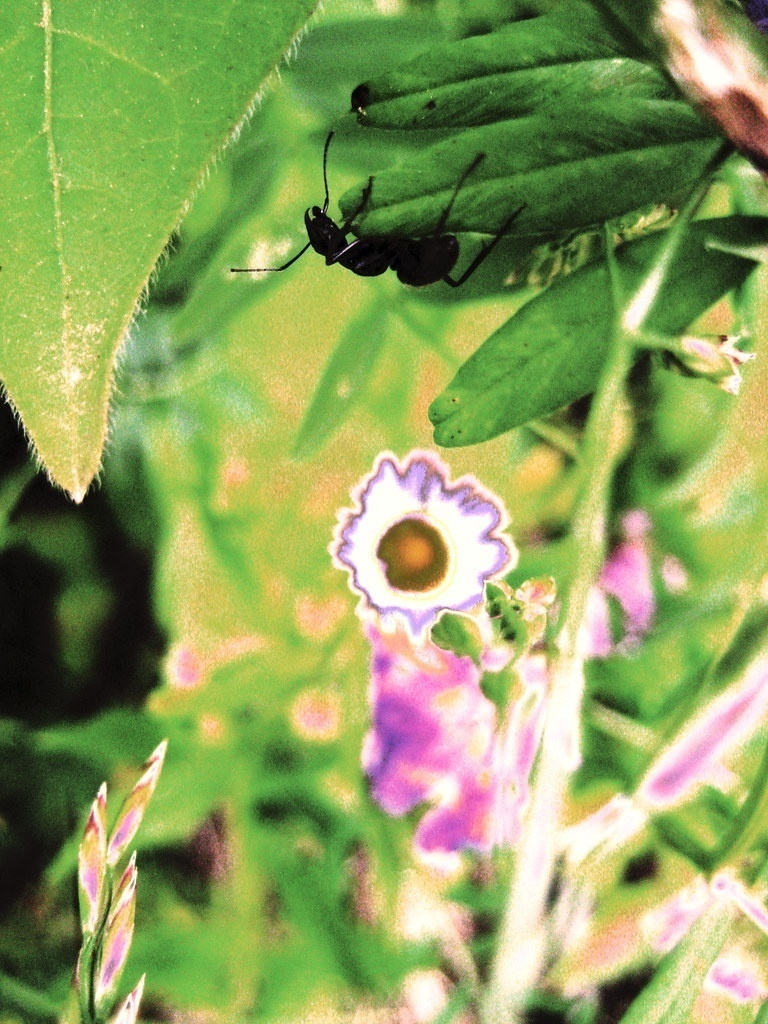

['COD10K-CAM-2-Terrestrial-21-Ant-1233.jpg', 'COD10K-CAM-2-Terrestrial-21-Ant-1249.jpg']


In [8]:
import os
from IPython.display import Image, display

# Show one result
display(Image("/content/runs/detect/predict/COD10K-CAM-2-Terrestrial-21-Ant-1249.jpg"))  # Replace with actual filename

# Or list all files
print(os.listdir("runs/detect/predict"))


Succesfully trained the mdv6 but inference results as of yet show that the model is failing in detecting objects, will work on this

---


